In [1]:
#Generate data
import numpy as np

np.random.seed(3) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [2]:
#Stats
print 'Class 1 means: \n', np.mean(class1_sample, 1, keepdims=True)
print
print 'Class 2 means: \n', np.mean(class2_sample, 1, keepdims=True)
print 
print 'Class 1 std: \n', np.std(class1_sample, axis=1, keepdims=True)
print 
print 'Class 2 std: \n', np.std(class2_sample, axis=1, keepdims=True)

Class 1 means: 
[[-0.21082512]
 [-0.33434397]
 [-0.14312852]]

Class 2 means: 
[[ 1.32402968]
 [ 0.98756112]
 [ 0.95315542]]

Class 1 std: 
[[ 1.06743742]
 [ 1.06869396]
 [ 1.02241495]]

Class 2 std: 
[[ 0.89530535]
 [ 1.09625761]
 [ 0.80369628]]


Populating the interactive namespace from numpy and matplotlib


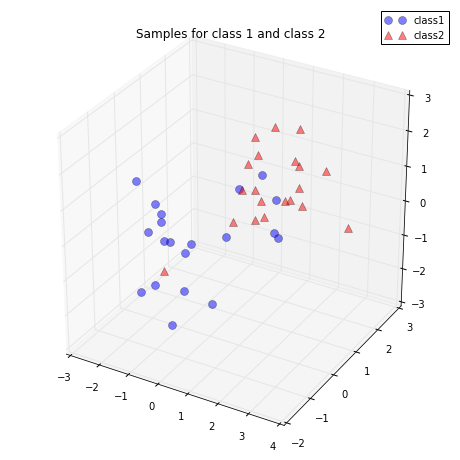

In [3]:
#plot
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [5]:
#Concatenate the two classes
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [6]:
#Computing D-dim means
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print 'Mean Vector:\n', mean_vector

Mean Vector:
[[ 0.55660228]
 [ 0.32660857]
 [ 0.40501345]]


In [7]:
#Scatter matrix
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print 'Scatter Matrix:\n', scatter_matrix

Scatter Matrix:
[[ 62.3776786   27.39299296  20.41076198]
 [ 27.39299296  64.35208114  13.56655464]
 [ 20.41076198  13.56655464  45.84358562]]


In [8]:
#Covariance matrix
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print 'Covariance Matrix:\n', cov_mat

Covariance Matrix:
[[ 1.59942766  0.70238443  0.52335287]
 [ 0.70238443  1.65005336  0.34786038]
 [ 0.52335287  0.34786038  1.17547655]]


In [9]:
# Eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.6593521 ]
 [-0.63708532]
 [-0.39922063]]
Eigenvalue 1 from scatter matrix: 101.20377932
Eigenvalue 1 from covariance matrix: 2.5949687005
('Scaling factor: ', 39.000000000000036)
----------------------------------------
Eigenvector 2: 
[[-0.68387663]
 [ 0.28760808]
 [ 0.67051797]]
Eigenvalue 2 from scatter matrix: 30.8453411301
Eigenvalue 2 from covariance matrix: 0.790906182823
('Scaling factor: ', 39.000000000000007)
----------------------------------------
Eigenvector 3: 
[[ 0.31235808]
 [-0.71512509]
 [ 0.62532275]]
Eigenvalue 3 from scatter matrix: 40.5242249148
Eigenvalue 3 from covariance matrix: 1.03908269012
('Scaling factor: ', 38.999999999999993)
----------------------------------------


In [10]:
#Check eigenvector-eigenvalue calculation
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


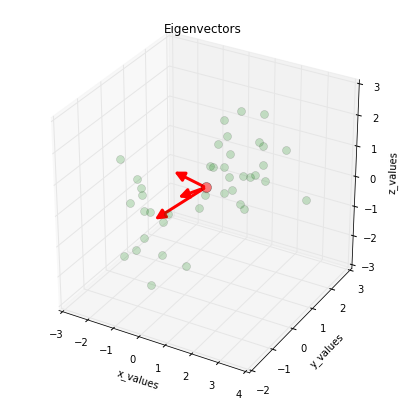

In [11]:
#Plot eigenvectors
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [12]:
#Eigenvectors have length ~1
for ev in eig_vec_sc.T:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [13]:
#Sort eigenvectors

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

101.20377932
40.5242249148
30.8453411301


In [14]:
#Choose top k eigenvectors
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print 'Matrix W:\n', matrix_w

Matrix W:
[[-0.6593521   0.31235808]
 [-0.63708532 -0.71512509]
 [-0.39922063  0.62532275]]


In [15]:
#Transform
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

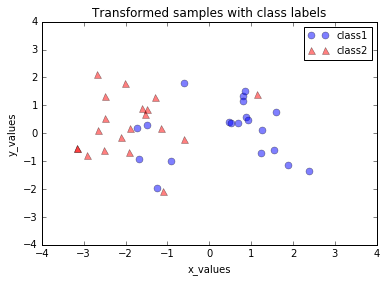

In [16]:
#Plot fransformed data
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

PC axes in terms of the measurement axes scaled by the standard deviations:
[[-0.62794104 -0.56656673 -0.53356555]
 [ 0.0844714   0.63191984 -0.77041671]
 [-0.77366312  0.5288473   0.34894972]]


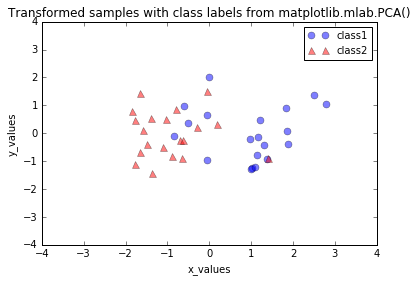

In [17]:
#Matplotlib version of pca
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print 'PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

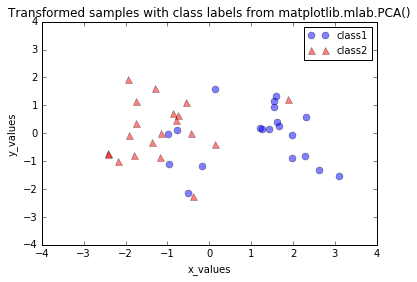

In [18]:
#pca with sklearn
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

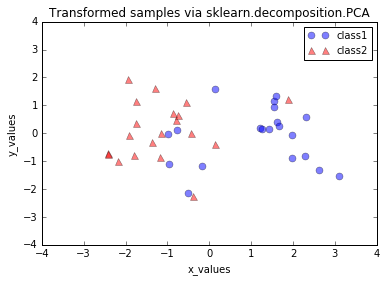

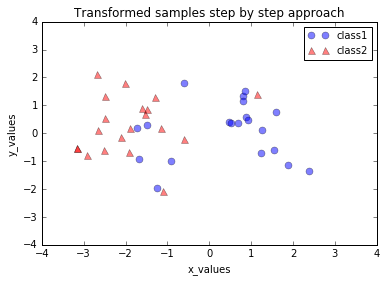

In [19]:
# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()


In [20]:
#Own implementation

In [26]:
#PCA steps
#1. get data
#2. centralize
#3. compute scatter matrix / covariance matrix
#4. get eigenvectors, eigenvalues of scatter/cov matrix
#5. sort by eigenvalue size
#6. create transformation matrix from top k eigenvectors
#7. transform data

In [37]:
#2. centralize
def f_centralize_data(matrix, obsaxis=1):
    #assumes matrix is this shape [v1,v2,v3,v4...,vn]
    means = np.mean(matrix, obsaxis, keepdims=True)
    c = matrix - means
    return c

In [38]:
#3. scatter matrix
def f_scatter_matrix(matrix,dimaxis=0):
    #assumes matrix is this shape [v1,v2,v3,v4...,vn]
    vaxis = int(not(dimaxis))
    matsize = matrix.shape[dimaxis]    
    c_matrix = f_centralize_data(matrix,vaxis)
    #using simple matrix multiplication for this
    sm = np.dot(c_matrix, c_matrix.T)    
    return sm

In [39]:
#4-5. eigenvectors
def f_eigvecval(scatter, sort=True):
    (eigvals, eigvecs) = np.linalg.eig(scatter)
    if sort:
        desc_order = np.argsort(eigvals)[::-1]
        eigvals = eigvals[desc_order]
        eigvecs = eigvecs[:,desc_order]
    return (eigvals, eigvecs)

my_scatter_matrix = f_scatter_matrix(all_samples)
my_eigvals, my_eigvecs = f_eigvecval(my_scatter_matrix) 
print my_eigvals
print my_eigvecs
#np.testing.assert_array_almost_equal(my_eigvals, eig_val_sc)
#np.testing.assert_array_almost_equal(my_eigvecs, eig_vec_sc)

[ 101.20377932   40.52422491   30.84534113]
[[-0.6593521   0.31235808 -0.68387663]
 [-0.63708532 -0.71512509  0.28760808]
 [-0.39922063  0.62532275  0.67051797]]


In [46]:
#My PCA implementation
def f_pca(data):
    my_scatter_matrix = f_scatter_matrix(data)
    my_eigvals, my_eigvecs = f_eigvecval(my_scatter_matrix) 
    return (my_eigvals, my_eigvecs)

my_eigvals, my_eigvecs = f_pca(all_samples)
print my_eigvals
print my_eigvecs

[ 101.20377932   40.52422491   30.84534113]
[[-0.6593521   0.31235808 -0.68387663]
 [-0.63708532 -0.71512509  0.28760808]
 [-0.39922063  0.62532275  0.67051797]]


In [47]:
#6.
W = my_eigvecs[:,:2]
np.testing.assert_almost_equal(W, matrix_w)
print W

[[-0.6593521   0.31235808]
 [-0.63708532 -0.71512509]
 [-0.39922063  0.62532275]]


In [48]:
new_data = np.dot(W.T, all_samples)
print shape(new_data)
print shape(transformed)

(2L, 40L)
(2L, 40L)


In [49]:
np.testing.assert_almost_equal(new_data, transformed)

In [51]:
#Test it all
#1. data
print 'data: ', shape(all_samples)

#2. centralize
c_all_samples = f_centralize_data(all_samples, 1)
print 'centralized data: ', shape(c_all_samples)
#print np.mean(c_all_samples, 1, keepdims=True)

#3. scatter matrix
my_scatter_matrix = f_scatter_matrix(all_samples)
print 'scatter matrix: \n', my_scatter_matrix

#4-5. eigenvalues and eigenvectors
my_eigvals, my_eigvecs = f_eigvecval(my_scatter_matrix)
print 'eigenvalues: ', my_eigvals
print 'eigenvectors: \n', my_eigvecs



#test equality to original implementation
np.testing.assert_array_almost_equal(f_scatter_matrix(all_samples), scatter_matrix)

data:  (3L, 40L)
centralized data:  (3L, 40L)
scatter matrix: 
[[ 62.3776786   27.39299296  20.41076198]
 [ 27.39299296  64.35208114  13.56655464]
 [ 20.41076198  13.56655464  45.84358562]]
eigenvalues:  [ 101.20377932   40.52422491   30.84534113]
eigenvectors: 
[[-0.6593521   0.31235808 -0.68387663]
 [-0.63708532 -0.71512509  0.28760808]
 [-0.39922063  0.62532275  0.67051797]]
